In [104]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from scipy import stats as ss
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [147]:
filepath = '/Users/Aman/Desktop/Colin/'
# df = pd.read_csv('filepath + 'website_metrics.txt'')
df = pd.read_csv('http://web.eecs.umich.edu/~harshavm/web_complexity/website_metrics')

In [148]:
Y = df['median_page_download_time']
X = df[['number_of_servers_contacted',
        'number_of_object_requests_median',
        'object_request_size_median',
        'number_of_javascript_objects_median',
        'size_of_javascript_objects_median',
        'number_of_image_objects_median',
        'size_of_image_objects_median',
        'number_of_flash_objects_median',
        'size_of_flash_objects_median',
        'number_of_css_objects_median',
        'size_of_css_objects_median'
       ]]

legends_label = ['#servers_contacted',
        '#object_requested',
        'object_request_size',
        '#javascript_objects',
        'size_of_javascript_objects',
        '#image_objects',
        'size_of_image_objects',
        '#flash_objects',
        'size_of_flash_objects',
        '#css_objects',
        'size_of_css_objects'
       ]

# Linear Regression.

('Coefficients: \n', array([ 0.13167658,  0.79767041, -0.01362765,  0.11027205,  0.06343789,
       -0.33478202,  0.0886664 , -0.03954514, -0.00513715, -0.03324378,
        0.06891919]))
Residual sum of squares: 0.36


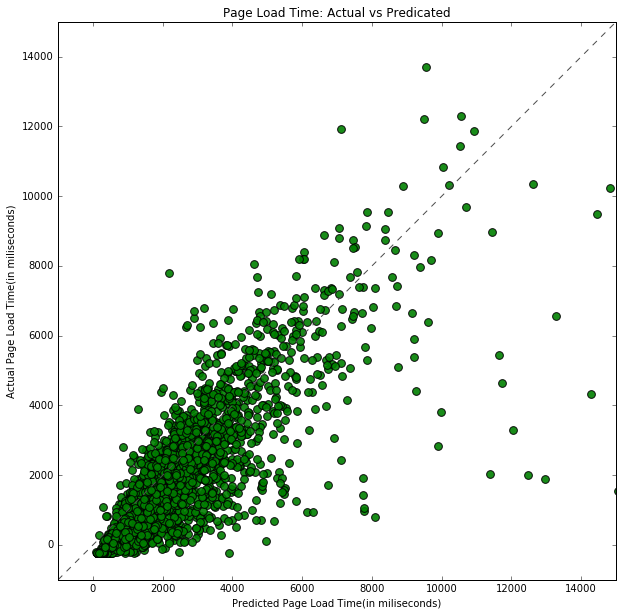

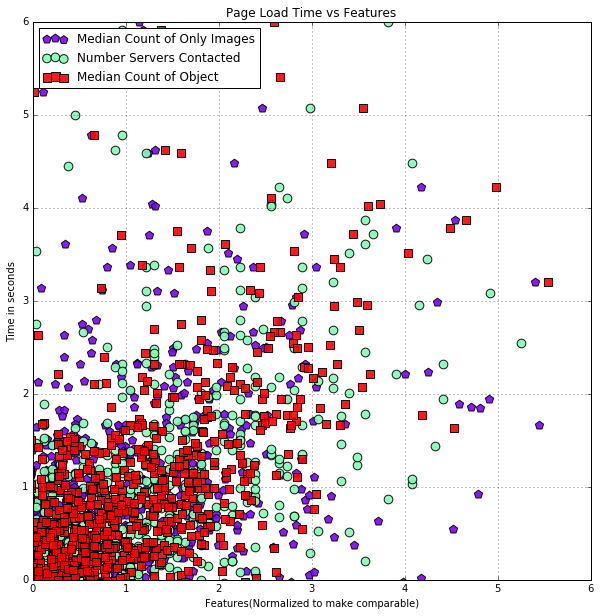

In [149]:

def normalize(Y,X):
    X = np.array(X)
    Y = np.array(Y)
    Y = np.array(ss.zscore(Y)).T
    X = np.array([(ss.zscore(x)) for x in X.T]).T
    return Y,X

norm_Y, norm_X = normalize(Y,X)

def regression(Y,X):
    regr_model = linear_model.LinearRegression()
    regr_model.fit(X,Y)
    print('Coefficients: \n', regr_model.coef_)
    P = regr_model.predict(X)
    print("Residual sum of squares: %.2f"% np.mean((P - Y) ** 2))
    
    return regr_model,P

regr_model,Predicted = regression(norm_Y,norm_X)


Predicted = (Predicted*np.mean(df['median_page_download_time'])) + np.std(df['median_page_download_time'])

f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(Y, Predicted, s=60,c='g',alpha= 0.9)
ax.set_ylim(ymin=-1000)
ax.set_xlim(xmin=-1000)
ax.set_ylim(ymax=15000)
ax.set_xlim(xmax=15000)
plt.xlabel("Predicted Page Load Time(in miliseconds)")
plt.ylabel("Actual Page Load Time(in miliseconds)")
plt.title("Page Load Time: Actual vs Predicated")
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.show()




number_of_servers_contacted = np.array(ss.zscore(df.number_of_servers_contacted))
number_of_object_requests_median = np.array(ss.zscore(df.number_of_object_requests_median))
number_of_image_objects_median = np.array(ss.zscore(df.number_of_image_objects_median))

colors = iter(cm.rainbow(np.linspace(0, 1, 3)))
f1, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_ylim(ymax=6)
ax1.set_xlim(xmax=6)
ax1.scatter(number_of_image_objects_median,norm_Y , s=75,color=next(colors), marker="p",edgecolor = 'black', label='Median Count of Only Images',alpha=0.9)
ax1.scatter(number_of_servers_contacted,norm_Y , s=75,color=next(colors), marker="o",edgecolor = 'black', label='Number Servers Contacted',alpha=0.9)
ax1.scatter(number_of_object_requests_median,norm_Y , s=75,color=next(colors), marker="s",edgecolor = 'black', label='Median Count of Object',alpha=0.9)


plt.legend(loc='upper left');
plt.colors()
plt.ylabel('Time in seconds')
plt.xlabel('Features(Normalized to make comparable)')
plt.grid(True)
plt.title("Page Load Time vs Features")
plt.show()

# Dimensionality Reduction(PCA).

PCA Components:
[[  4.34602179e-06   3.26156469e-05   9.01128891e-01   6.13810899e-06
    1.70255598e-01   1.94725460e-05   3.66017166e-01   1.15222048e-06
    1.53790297e-01   1.46873101e-06   3.68745127e-02]
 [  2.41596791e-06  -1.40776905e-05   1.79608197e-01   4.45273878e-06
    1.47584307e-01  -2.52422237e-05  -7.65287897e-01   2.44200210e-06
    5.99754271e-01   8.18538151e-07   2.42696386e-02]]


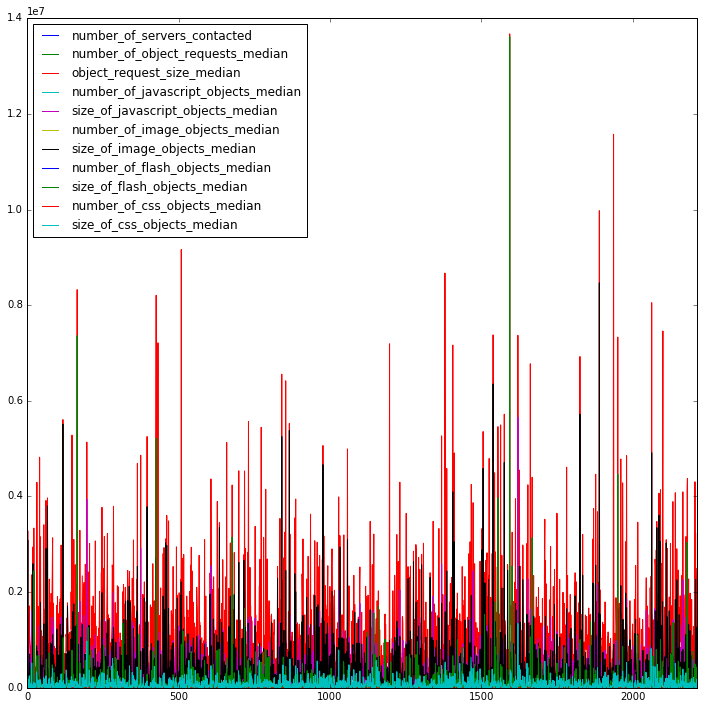

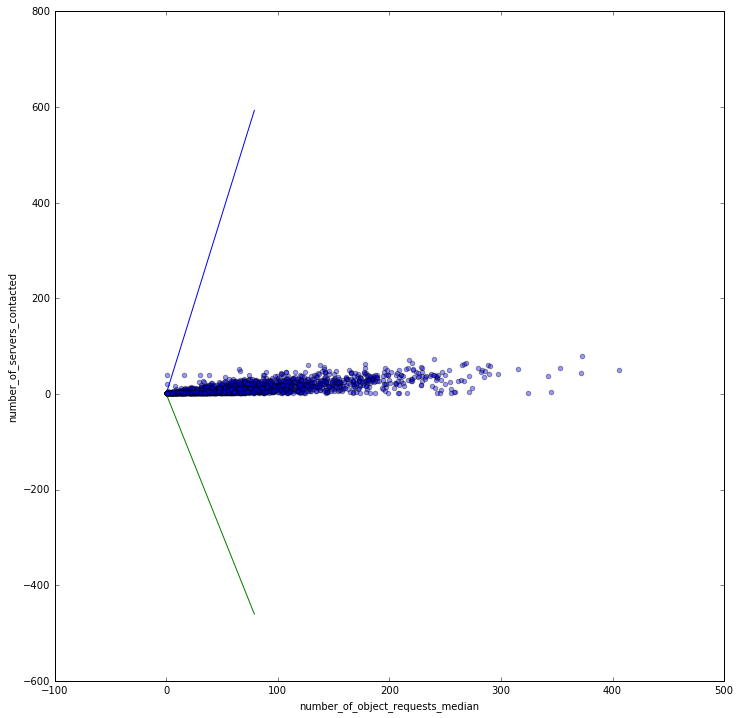

In [150]:
mean_X = X
mean_X.plot()
mean_X.plot(kind='scatter', x ='number_of_object_requests_median', y = 'number_of_servers_contacted', alpha=.4)
model = PCA(n_components = 2)

model.fit(mean_X)
V = model.components_
print "PCA Components:"
print V
# plt.scatter([V[0][0]], [V[0][1]], c = [9])
for c in V:
    slope = c[1]/c[0]    
    xpoints = np.linspace(float(X[[0]].min()), float(X[[0]].max()), 10)
    UDc = [xp*slope for xp in xpoints] #the pricipal component for the given direction
    plt.plot(xpoints, UDc)
#plt.ylim([-3,3])
#plt.xlim([-3,3])
plt.show()
#sys.exit(1)


# Regularization(Ridge and Lasso)

Learning Rate: 0.0001 	Mean Square Error: 0.35661115481
Learning Rate: 0.0016 	Mean Square Error: 0.356611154846
Learning Rate: 0.0256 	Mean Square Error: 0.356611163974
Learning Rate: 0.4096 	Mean Square Error: 0.35661341466
Learning Rate: 6.5536 	Mean Square Error: 0.356955531842
Learning Rate: 104.8576 	Mean Square Error: 0.360996583205
Learning Rate: 1677.7216 	Mean Square Error: 0.380579029441


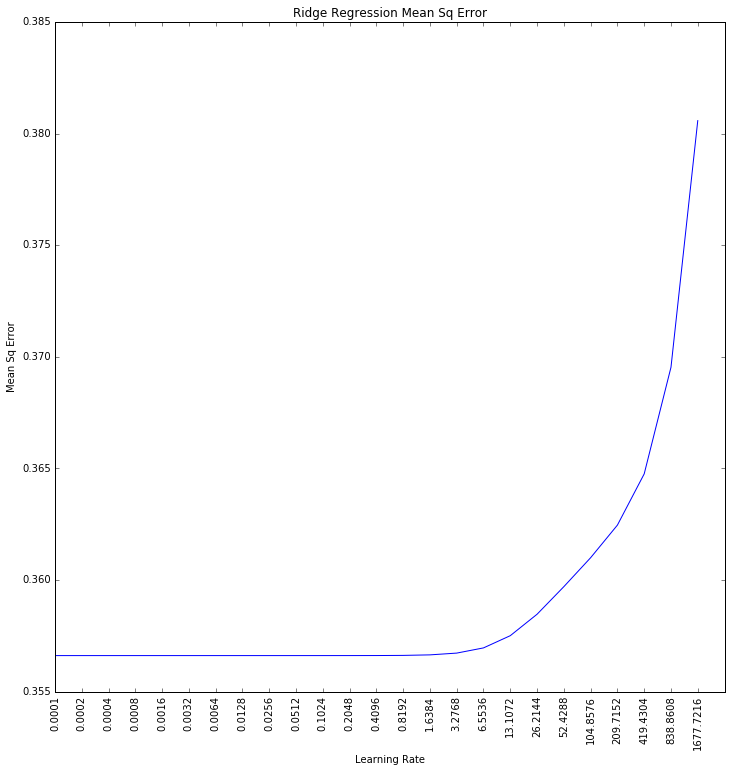

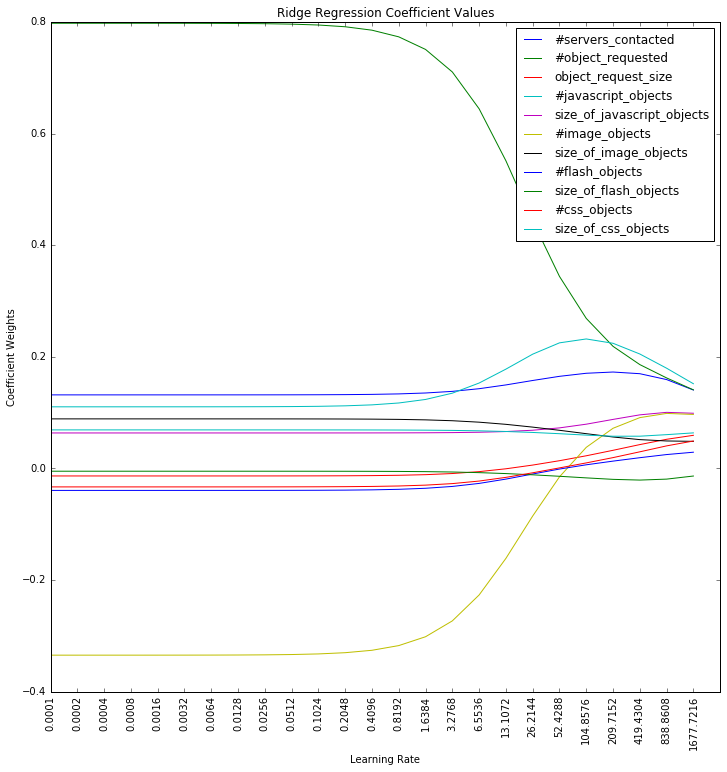

In [151]:
#Comparison of Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso
import uuid

weights = []
mses = []

alphas = [(2**i)/10000.0 for i in xrange(25)]
index = 0
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(norm_X,norm_Y)
    weights.append(ridge.coef_)
    ridge_Y_predict = ridge.predict(norm_X)
    mean_sq_err = np.mean((ridge_Y_predict - norm_Y)**2)
    if index % 4 == 0:
        print "Learning Rate:",alpha,"\tMean Square Error:",mean_sq_err
    mses.append(mean_sq_err)
    index += 1
    
plt.plot([i for i in xrange(len(alphas))], mses)
plt.xticks([i for i in xrange(len(alphas))], alphas, rotation='vertical')
plt.ylabel("Mean Sq Error")
plt.xlabel("Learning Rate")
plt.title("Ridge Regression Mean Sq Error")

plt.show()

fig, ax = plt.subplots()
ax.plot([[i]*len(weights[0]) for i in xrange(len(alphas))], weights)#
plt.xticks([i for i in xrange(len(alphas))], alphas, rotation='vertical')
plt.ylabel("Coefficient Weights")
plt.xlabel("Learning Rate")
plt.title("Ridge Regression Coefficient Values")
plt.legend()
ax.legend(lines, legends_label)
plt.show()


mses = []
weights = []


Learning Rate: 0.0001 	Mean Square Error: 0.356613149429
Learning Rate: 0.0002 	Mean Square Error: 0.356619132904
Learning Rate: 0.0004 	Mean Square Error: 0.356643052758
Learning Rate: 0.0008 	Mean Square Error: 0.356738671962
Learning Rate: 0.0016 	Mean Square Error: 0.357063705062
Learning Rate: 0.0032 	Mean Square Error: 0.358286180823
Learning Rate: 0.0064 	Mean Square Error: 0.35996532059
Learning Rate: 0.0128 	Mean Square Error: 0.36025364616
Learning Rate: 0.0256 	Mean Square Error: 0.361223349817
Learning Rate: 0.0512 	Mean Square Error: 0.365133214634
Learning Rate: 0.1024 	Mean Square Error: 0.377582787178
Learning Rate: 0.2048 	Mean Square Error: 0.419037994632
Learning Rate: 0.4096 	Mean Square Error: 0.568279054003
Learning Rate: 0.8192 	Mean Square Error: 1.0


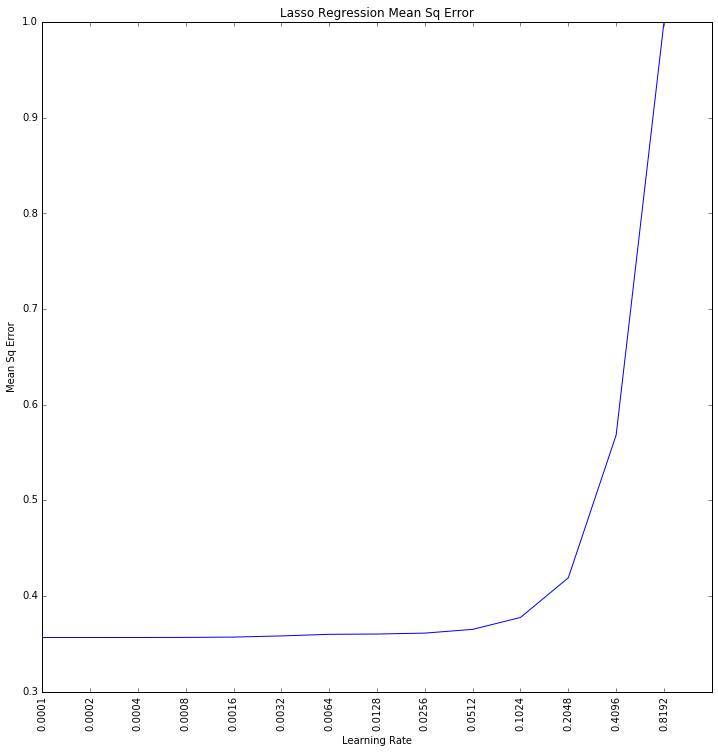

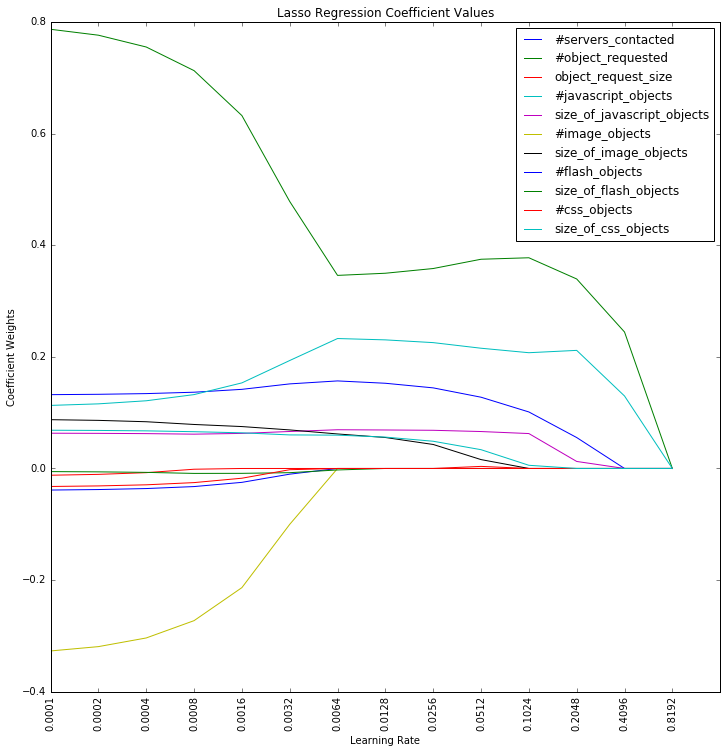

In [152]:
#Lasso
alphas = [(2**i)/10000.0 for i in xrange(14)]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(norm_X,norm_Y)
    
    lasso_Y_predict = lasso.predict(norm_X)
    weights.append(lasso.coef_)
    mean_sq_err = np.mean((lasso_Y_predict - norm_Y)**2)
    print "Learning Rate:",alpha,"\tMean Square Error:",mean_sq_err
    mses.append(mean_sq_err)
    
plt.plot([i for i in xrange(len(alphas))], mses)
plt.xticks([i for i in xrange(len(alphas))], alphas, rotation='vertical')
plt.ylabel("Mean Sq Error")
plt.xlabel("Learning Rate")
plt.title("Lasso Regression Mean Sq Error")
plt.show()

fig, ax = plt.subplots()
lines = ax.plot([[i]*len(weights[0]) for i in xrange(len(alphas))], weights)#
plt.xticks([i for i in xrange(len(alphas))], alphas, rotation='vertical')
plt.ylabel("Coefficient Weights")
plt.xlabel("Learning Rate")
plt.title("Lasso Regression Coefficient Values")
plt.legend()

ax.legend(lines, legends_label)
# ax.legend(lines, [str(uuid.uuid4())[:6] for j in range(len(lines))])
plt.show()